In [1]:
import pandas as pd

In [31]:
df = pd.read_csv("C:/Users/aksha/Downloads/heart_disease_uci.csv")
df = pd.DataFrame(data)
print(df)

      id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thal

In [ ]:
#TASK01

In [32]:
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [33]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [13]:
import numpy as np

In [34]:
print(df["trestbps"].mean())

132.13240418118468


In [36]:
#print(data.replace(np.nan,5555))
df["trestbps"] = df["trestbps"].replace(np.nan,(df["trestbps"].mean()))
df["chol"] = df["chol"].replace(np.nan,(df["chol"].mean()))
df["thalch"] = df["thalch"].replace(np.nan,(df["thalch"].mean()))
df["oldpeak"] = df["oldpeak"].replace(np.nan,(df["oldpeak"].mean()))
df["chol"] = df["chol"].replace(np.nan,(df["chol"].mean()))
df["ca"] = df["ca"].replace(np.nan,(df["ca"].mean()))
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca            0
thal        486
num           0
dtype: int64


In [47]:
#TASK01

In [37]:
#data.fillna(method="bfill")
# Example: Backfilling missing values
#filled_data = data.fillna(method="bfill", axis=0)
#print(filled_data)
#print(data.[fbs].fillna("True"))
df['fbs'] = df['fbs'].fillna('True')
df['restecg'] = df['restecg'].fillna('normal')
df['exang'] = df['exang'].fillna('FALSE')
df['slope'] = df['slope'].fillna('flat')
df['thal'] = df['thal'].fillna('Normal')
#print(data)
print(df.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [17]:
# Fill numeric columns with mean and non-numeric with 'missing'
#"data = data.fillna({
 #  col: data[col].mean() if data[col].dtype in ['int64', 'float64'] else 'missing'
 #   for col in data.columns
#})

#print(data)"


In [38]:
# Fill null values in 'sex' column with mode
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
print(df.tail(2))

      id  age   sex        dataset               cp    trestbps   chol    fbs  \
918  919   58  Male  VA Long Beach     asymptomatic  132.132404  385.0   True   
919  920   62  Male  VA Long Beach  atypical angina  120.000000  254.0  False   

            restecg      thalch  exang   oldpeak slope        ca    thal  num  
918  lv hypertrophy  137.545665  FALSE  0.878788  flat  0.676375  Normal    0  
919  lv hypertrophy   93.000000   True  0.000000  flat  0.676375  Normal    1  


In [39]:
# Check for null values and data types
print(df.info())

# Summarize the data
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  920.000000  

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
import pandas as pd

# Path to the large dataset
file_path = "C:/Users/aksha/Downloads/heart_disease_uci.csv"

# Define chunk size (adjust based on your system's memory)
chunk_size = 100000

# Specify the columns of interest
columns_of_interest = ["cp", "trestbps", "chol", "fbs", "restecg", 
                        "thalch", "exang", "oldpeak", "slope", "ca", "thal", "num"]

# Initialize a dictionary to store counts for the specified columns
feature_counts = {col: 0 for col in columns_of_interest}

# Process the dataset in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size, usecols=columns_of_interest):
    for column in columns_of_interest:
        # Count non-null values for the current column and accumulate
        feature_counts[column] += chunk[column].count()

# Display the results
print("Feature-wise Entry Counts (Selected Columns):")
for column, count in feature_counts.items():
    print(f"{column}: {count}")


Feature-wise Entry Counts (Selected Columns):
cp: 920
trestbps: 861
chol: 890
fbs: 830
restecg: 918
thalch: 865
exang: 865
oldpeak: 858
slope: 611
ca: 309
thal: 434
num: 920


In [6]:
#TASK2.1

C:\Users\aksha\AppData\Local\Temp\ipykernel_21800\3446850630.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_analysis = df.groupby(['age_group', 'chol_group'])['num'].mean().reset_index()
C:\Users\aksha\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


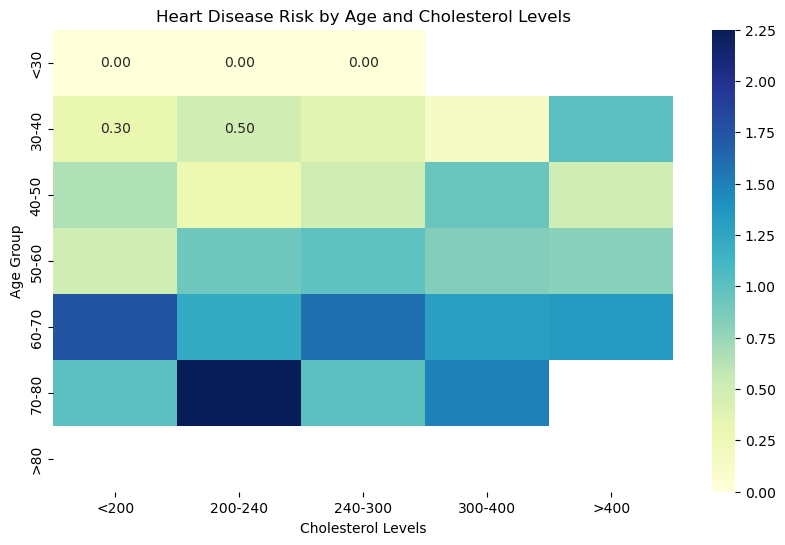

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

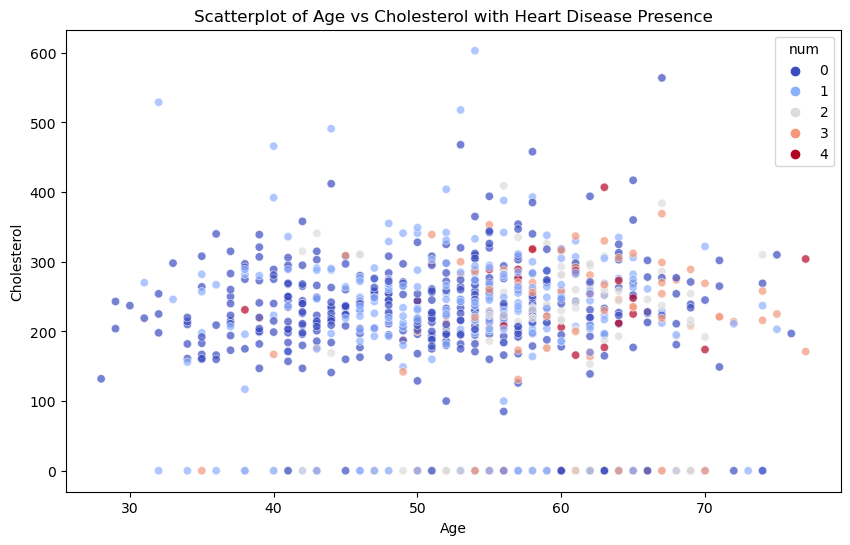

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path to your dataset
file_path = "C:/Users/aksha/Downloads/heart_disease_uci.csv"

# Load the dataset (only relevant columns)
columns_of_interest = ["age", "chol", "num"]
df = pd.read_csv("C:/Users/aksha/Downloads/heart_disease_uci.csv", usecols=columns_of_interest)

# Step 1: Data Cleaning - Remove rows with missing values
df = df.dropna()

# Step 2: Create bins for age and cholesterol levels
age_bins = [0, 30, 40, 50, 60, 70, 80, 100]
chol_bins = [0, 200, 240, 300, 400, 600]

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=['<30', '30-40', '40-50', '50-60', '60-70', '70-80', '>80'])
df['chol_group'] = pd.cut(df['chol'], bins=chol_bins, labels=['<200', '200-240', '240-300', '300-400', '>400'])

# Step 3: Calculate heart disease risk (mean of 'num' for each group)
risk_analysis = df.groupby(['age_group', 'chol_group'])['num'].mean().reset_index()
risk_analysis.rename(columns={'num': 'heart_disease_risk'}, inplace=True)

# Step 4: Prepare the data for visualization
risk_pivot = risk_analysis.pivot(index='age_group', columns='chol_group', values='heart_disease_risk')

# Step 5: Visualization - Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(risk_pivot, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)
plt.title("Heart Disease Risk by Age and Cholesterol Levels")
plt.xlabel("Cholesterol Levels")
plt.ylabel("Age Group")
plt.show()

# Step 6: Visualization - Scatterplot of Age vs Cholesterol with Heart Disease Risk
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='chol', hue='num', palette='coolwarm', alpha=0.7)
plt.title("Scatterplot of Age vs Cholesterol with Heart Disease Presence")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.colorbar(label="Heart Disease Risk (num)")
plt.show()
